In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

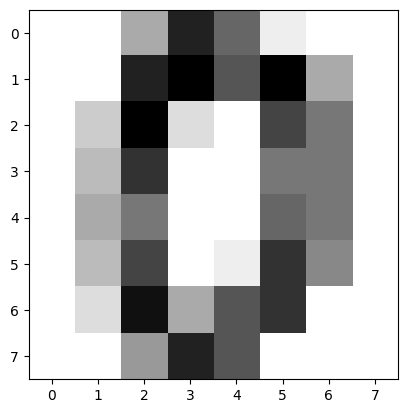

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')


In [3]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
data, digits.target, test_size=0.2)


In [14]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
X_train.shape, X_test.shape, y_train.shape

((1437, 64), (360, 64), (1437,))

In [17]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 - 2s - 177ms/step - accuracy: 0.3368 - loss: 3.0750 - val_accuracy: 0.8542 - val_loss: 0.5099
Epoch 2/10
9/9 - 0s - 18ms/step - accuracy: 0.7659 - loss: 0.6857 - val_accuracy: 0.9201 - val_loss: 0.3015
Epoch 3/10
9/9 - 0s - 18ms/step - accuracy: 0.8747 - loss: 0.3589 - val_accuracy: 0.9340 - val_loss: 0.2262
Epoch 4/10
9/9 - 0s - 18ms/step - accuracy: 0.9234 - loss: 0.2224 - val_accuracy: 0.9479 - val_loss: 0.1667
Epoch 5/10
9/9 - 0s - 18ms/step - accuracy: 0.9469 - loss: 0.1553 - val_accuracy: 0.9583 - val_loss: 0.1292
Epoch 6/10
9/9 - 0s - 17ms/step - accuracy: 0.9521 - loss: 0.1320 - val_accuracy: 0.9618 - val_loss: 0.1180
Epoch 7/10
9/9 - 0s - 19ms/step - accuracy: 0.9634 - loss: 0.1027 - val_accuracy: 0.9549 - val_loss: 0.1096
Epoch 8/10
9/9 - 0s - 18ms/step - accuracy: 0.9713 - loss: 0.0896 - val_accuracy: 0.9757 - val_loss: 0.1031
Epoch 9/10
9/9 - 0s - 17ms/step - accuracy: 0.9765 - loss: 0.0768 - val_accuracy: 0.9722 - val_loss: 0.1010
Epoch 10/10
9/9 - 0s - 17ms/step - acc

In [19]:
import numpy as np
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


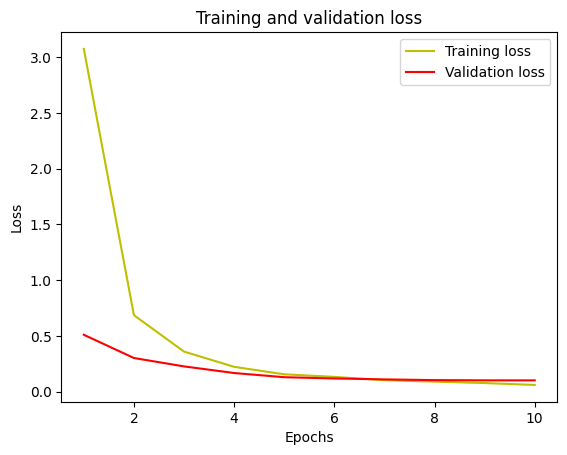

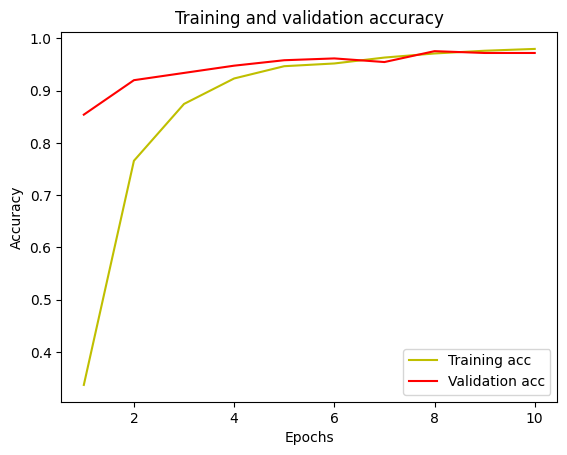

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       0.94      0.97      0.96        35
           2       1.00      1.00      1.00        31
           3       0.97      0.94      0.95        33
           4       0.97      0.97      0.97        33
           5       0.97      1.00      0.99        34
           6       1.00      0.97      0.99        34
           7       0.95      0.97      0.96        39
           8       0.95      0.90      0.93        41
           9       0.98      0.96      0.97        49

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[31  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  1  0  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  1  0  0  1  0]
 [ 0  0  0  0 32  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  0  0]
 [ 1  0  0  0  0  0 33  0  0  0]
 [ 0  0  0

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))